## Importation des Librairies & des bases de données 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import Counter

In [2]:
country_series = pd.read_csv('EdStatsCountry-Series.csv')
country = pd.read_csv('EdStatsCountry.csv')
data = pd.read_csv('EdStatsData.csv')
footnote = pd.read_csv('EdStatsFootNote.csv')
series = pd.read_csv('EdStatsSeries.csv')

#Index pour améliorer l'affichage des bases de données

liste_bdd = [country_series,country,data,footnote,series]

id_bdd = ["Base de données Country_series","Base de données Country","Base de données Data",
          "Base de données Footnote","Base de données Series"]

#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-524392f4d959>:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Analyse des bases de données

### Fonctions utilisées

In [3]:
def info_colonne(i):
    print(id_bdd[i],"\n\n","Lignes =",liste_bdd[i].shape[0],"Colonnes =",liste_bdd[i].shape[1],"\n")  
    print("Types de données:\n",liste_bdd[i].dtypes.value_counts(),"\n")
    print("Intitulé des colonnes:\n",liste_bdd[i].columns,"\n")

def heatmap_NaN(i):
    plt.figure(figsize=(15,5))
    sns.heatmap(liste_bdd[i].isna(),cbar=False) 

def plot_indic_pays(df, titre = ""):
    idx =  df["Country Name"]
    moy = df["moyenne"]
    mini = df["min"]
    maxi = df["max"]
    std = df["ecart_type"]
    
    # plot
    sns.set(style = "whitegrid", color_codes = True)
    plt.figure(figsize = (11, 8))
    plt.errorbar(x = idx, y = moy, yerr = std, fmt = "ok", lw = 3)
    plt.errorbar(x = idx, y = moy, yerr = [moy - mini, maxi - moy], fmt = ".k", ecolor = "red", capsize = 5, lw = 1)
    
    # Paramètres du plot
    plt.xticks(rotation = 45, rotation_mode = "anchor", ha = "right")
    plt.title(titre, fontsize = 20)
    plt.ylabel("Moyenne", fontsize = 16)
    plt.xlabel("Pays", fontsize = 16)
    
    # Legende
    lines = [Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="black"),
            Line2D([0], [0], color="black", linewidth=3, linestyle='-'),
            Line2D([0], [0], color="red", linewidth=3, linestyle='-')]
    labels = ['Moyenne', 'Ecart-type', 'Min-Max']
    plt.legend(lines, labels)
    
def plot_indic_region(df, titre = ""):&
    idx =  df["Region"]
    moy = df["moyenne"]
    mini = df["min"]
    maxi = df["max"]
    std = df["ecart_type"]
    
    # plot
    sns.set(style = "whitegrid", color_codes = True)
    plt.figure(figsize = (11, 8))
    plt.errorbar(x = idx, y = moy, yerr = std, fmt = "ok", lw = 3)
    plt.errorbar(x = idx, y = moy, yerr = [moy - mini, maxi - moy], fmt = ".k", ecolor = "red", capsize = 5, lw = 1)
    
    # Paramètres du plot
    plt.xticks(rotation = 45, rotation_mode = "anchor", ha = "right")
    plt.title(titre, fontsize = 20)
    plt.ylabel("Moyenne", fontsize = 16)
    plt.xlabel("Region", fontsize = 16)
    
    # Legende
    lines = [Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="black"),
            Line2D([0], [0], color="black", linewidth=3, linestyle='-'),
            Line2D([0], [0], color="red", linewidth=3, linestyle='-')]
    labels = ['Moyenne', 'Ecart-type', 'Min-Max']
    plt.legend(lines, labels)
    

### Base de données Country series

In [4]:
country_series.head(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN


In [5]:
info_colonne(0)

Base de données Country_series 

 Lignes = 613 Colonnes = 4 

Types de données:
 object     3
float64    1
dtype: int64 

Intitulé des colonnes:
 Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object') 



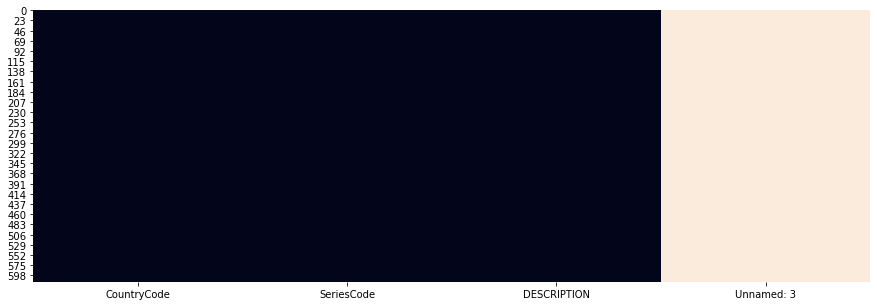

In [6]:
heatmap_NaN(0)


Ici, nous pouvons retirer la colonne Unnamed car elle ne contient aucune données

La colonne description nous donne la source des données (Eurostat… Institue of statistics…). Elle ne nous apporte aucune information mais elle ne nous gêne pas.

La colonne CountryCode est à garder

Cette base de données ne nous donne aucune information essentielle mais peut nous servir à comparer la quantité des données avec les autres Bases de données.

On n'exploitera pas cette base de données.


### Base de données Country

In [7]:
country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [8]:
info_colonne(1)

Base de données Country 

 Lignes = 241 Colonnes = 32 

Types de données:
 object     28
float64    4 
dtype: int64 

Intitulé des colonnes:
 Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnam

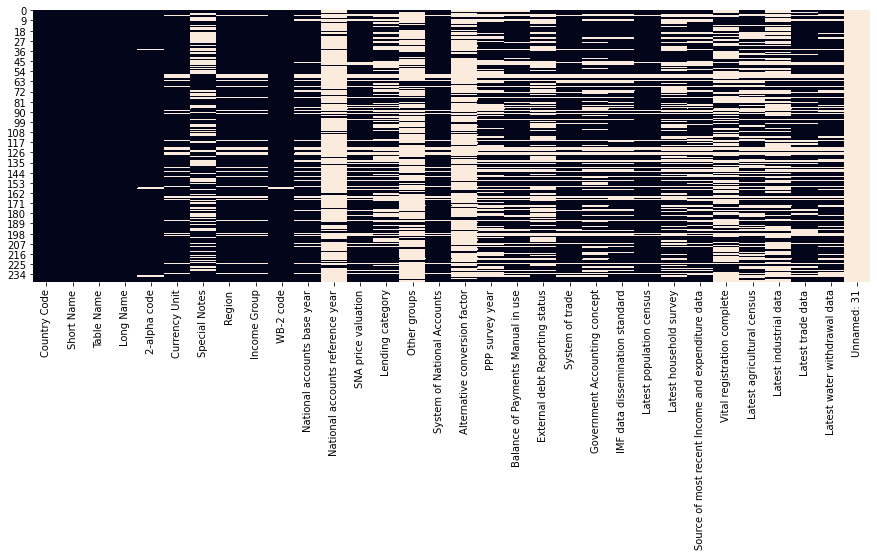

In [9]:
heatmap_NaN(1)

En regardant le graphique, nous constatons que nous pouvons supprimer d’office 4 colonnes qui contiennent un peu trop d’espace blanc (représentant les valeurs manquantes) :
'National Accounts reference year', 'Other groups', 'Alternative Conversion Factor', 'Unnamed 31'

Maintenant regardons quelles colonnes ne semblent pas pertinentes pour l’analyse de notre problème :
'Table Name', 'Long Name', '2-alpha code', 'Special Notes', 'WB-2code ', 'Latest population census', 'Latest household country', 'Source of most recent income and expenditure data ', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data','National accounts base year', 'SNA price valuation', 'Lending category'

Nous allons donc garder les colonnes : 'Country Code',  'Short Name',  'Currency Unit',  'Region',  'Income Group'


In [10]:
country_clean = country.copy().drop(['National accounts reference year', 'Other groups','Alternative conversion factor','Vital registration complete',
       'Table Name','Special Notes','Long Name', '2-alpha code','WB-2 code','Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data','Vital registration complete', 'Latest agricultural census','Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data','National accounts base year','SNA price valuation','System of National Accounts',
        'PPP survey year','Balance of Payments Manual in use', 'External debt Reporting status','System of trade',
        'Government Accounting concept','IMF data dissemination standard','Lending category','Unnamed: 31'],axis=1)

In [11]:
country_clean.head(3)

,Country Code,Short Name,Currency Unit,Region,Income Group
0,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,Afghan afghani,South Asia,Low income
2,AGO,Angola,Angolan kwanza,Sub-Saharan Africa,Upper middle income


### Base de données Data

In [12]:
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
info_colonne(2)

Base de données Data 

 Lignes = 886930 Colonnes = 70 

Types de données:
 float64    66
object     4 
dtype: int64 

Intitulé des colonnes:
 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object') 



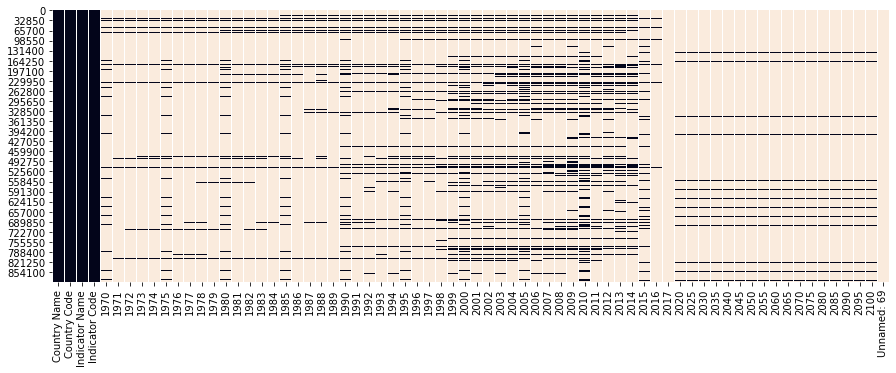

In [14]:
heatmap_NaN(2)

In [15]:
print(data["Indicator Code"].nunique())
print(data["Indicator Name"].nunique())

3665
3665


Dans cette base de données, nous avons des informations en fonction du Pays, du Code Pays, de l'Indicateur et du Code de l'indicateur pour les années 1970 à 2100.

Graphiquement nous pouvons voir qu’une analyse serait pertinente entre les années 2000 et 2015 avec un pic de données en 2010.
La colonne Unnamed 69 est à retirer car elle ne contient aucune données.

Les colonnes 'Indicator Name' et 'Indicator Code' nous montrent qu'il y a 3665 indicateurs.

On constate également qu’avant 1990 les données se manifestaient de manière importante tous les 5 ans.

A noter qu’à partir de 2020 on voit une continuité au niveau des données alors que les années ne sont pas encore apparues. 
Une hypothèse prédictive est mise en place

Nous allons donc séparer cette base de données en deux parties :
* Data_past = les années 1970 à 2017
* Data_future = les années 2020 à 2100

Cela nous permettra de comparer la pertinence des données sur le passe mais également sur ce qu'il risque de se passer


In [16]:
data.columns.unique()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [17]:
data_past= data.copy().drop(['2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1)

data_future = data.copy().drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', 'Unnamed: 69'],axis=1)


In [18]:
data_past.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data_future.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Base de données Footnote

In [20]:
footnote.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [21]:
info_colonne(3)

Base de données Footnote 

 Lignes = 643638 Colonnes = 5 

Types de données:
 object     4
float64    1
dtype: int64 

Intitulé des colonnes:
 Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object') 



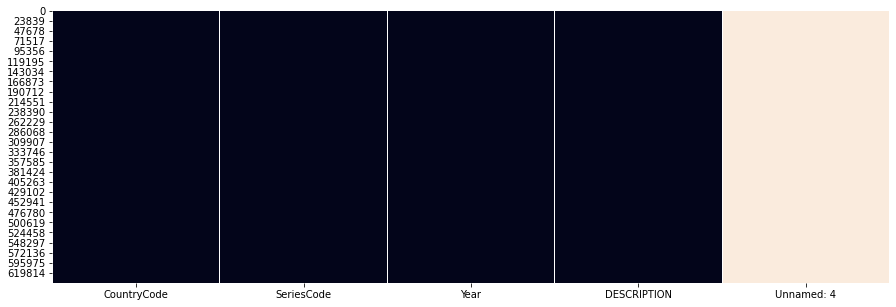

In [22]:
heatmap_NaN(3)

Unnamed à supprimer

Informations associées à chaque Country Code sans données pertinentes

Nous n'allons pas exploiter cette base de données

### Base de données Series

In [23]:
series.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
info_colonne(4)

Base de données Series 

 Lignes = 3665 Colonnes = 21 

Types de données:
 object     15
float64    6 
dtype: int64 

Intitulé des colonnes:
 Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object') 



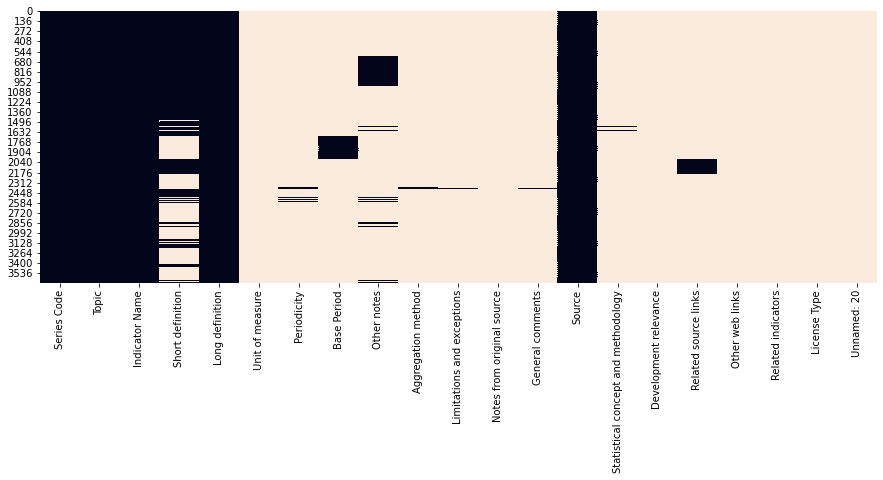

In [25]:
heatmap_NaN(4)

On nous donne des indications mais on voit pas de valeurs pouvant être exploitées

Cette base de données peut nous servir à comparer la quantité de jeu de données mais sans plus.

Nous n'allons pas exploiter cette base de données.

## Conclusion suite à la pré analyse

Les seules bases de données qui vont nous être utiles sont « Data » et « Country ».

Le reste permettent de grouper selon les indicateurs disponibles mais n'apporte aucune valeur ajoutée à la problématique.

## Analyse exploratoire des données

### Analyse des données passées

In [26]:
df_merge_past = pd.merge(country_clean,data_past, on = "Country Code")
df_merge_past.head(3)

,Country Code,Short Name,Currency Unit,Region,Income Group,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.332130,56.156502,45.716419,52.996460,49.965080,53.096840,59.058441,NaN,60.718788,60.643719,62.808041,NaN,78.047157,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.498428,59.691120,49.288391,59.051239,58.223461,57.107738,62.097809,NaN,65.384621,65.938301,68.178833,NaN,82.111633,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.187860,1.133350,1.169290,1.259030,1.399530,1.164840,1.109620,NaN,1.166480,1.189450,1.184040,NaN,1.108400,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_merge_past["Country Name"].nunique() == df_merge_past["Short Name"].nunique()

True

On peut donc retenir qu'une seule colonne pour désigner le nom du pays.

Nous allons donc supprimer la colonne 'Short Name'

In [28]:
df_merge_past = df_merge_past.copy().drop(['Short Name'],axis=1)

### Modification de l'ordre des colonnes des données passées

In [29]:
df_merge_past.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Code    883265 non-null  object 
 1   Currency Unit   787975 non-null  object 
 2   Region          784310 non-null  object 
 3   Income Group    784310 non-null  object 
 4   Country Name    883265 non-null  object 
 5   Indicator Name  883265 non-null  object 
 6   Indicator Code  883265 non-null  object 
 7   1970            72278 non-null   float64
 8   1971            35508 non-null   float64
 9   1972            35594 non-null   float64
 10  1973            35514 non-null   float64
 11  1974            35708 non-null   float64
 12  1975            87268 non-null   float64
 13  1976            37445 non-null   float64
 14  1977            37562 non-null   float64
 15  1978            37564 non-null   float64
 16  1979            36771 non-null   float64
 17  1980      

In [30]:
(df_merge_past.isna().sum()/df_merge_past.shape[0]).sort_values()

Country Code      0.000000
Country Name      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
Currency Unit     0.107884
Region            0.112033
Income Group      0.112033
2010              0.725584
2005              0.791641
2000              0.800032
2012              0.833327
2011              0.834764
2009              0.839228
2006              0.841222
2013              0.844374
2007              0.844666
2008              0.847869
1995              0.851302
2015              0.851725
2003              0.852495
2004              0.854249
1990              0.859191
2002              0.859485
2001              0.860225
1999              0.865530
2014              0.871250
1985              0.897805
1980              0.899114
1975              0.901198
1998              0.903873
1994              0.912341
1996              0.913050
1993              0.914199
1992              0.914510
1991              0.915773
1997              0.916847
1970              0.918170
1

In [31]:
cols_past = list(df_merge_past.columns)
df_merge_past = df_merge_past[[cols_past[0]] + [cols_past[4]] + [cols_past[2]] + [cols_past[1]] + [cols_past[3]] 
                              + cols_past[5:]]

In [32]:
df_merge_past.head(3)

,Country Code,Country Name,Region,Currency Unit,Income Group,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.332130,56.156502,45.716419,52.996460,49.965080,53.096840,59.058441,NaN,60.718788,60.643719,62.808041,NaN,78.047157,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.498428,59.691120,49.288391,59.051239,58.223461,57.107738,62.097809,NaN,65.384621,65.938301,68.178833,NaN,82.111633,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.187860,1.133350,1.169290,1.259030,1.399530,1.164840,1.109620,NaN,1.166480,1.189450,1.184040,NaN,1.108400,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse des données passées avant nettoyage

<BarContainer object of 48 artists>

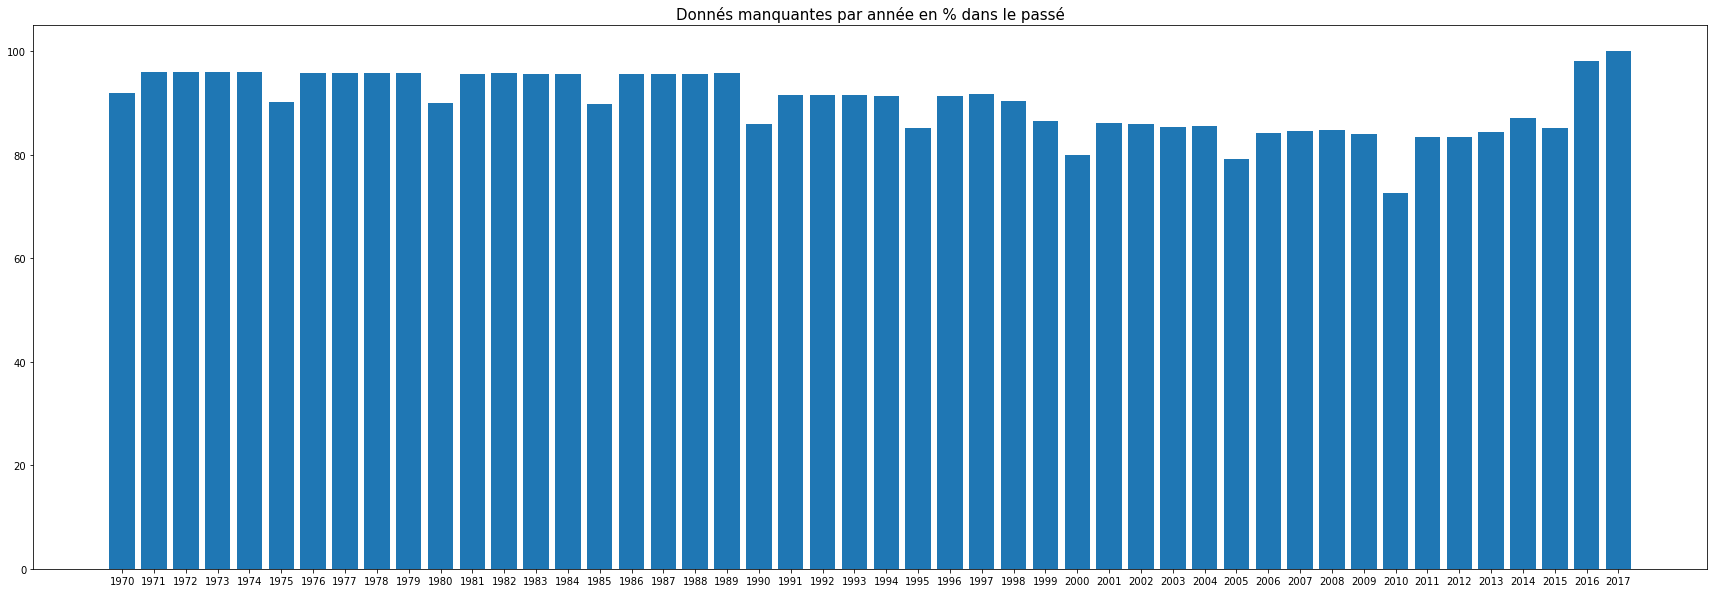

In [33]:
fig = plt.figure(figsize=((30,10)))
annees = df_merge_past.columns[7:]

x_label = [m_str for m_str in annees ] #boucle 

y = (df_merge_past[annees].isna().sum()/df_merge_past.shape[0])*100

plt.title('Donnés manquantes par année en % dans le passé', size= 15)

plt.bar(x_label,y)

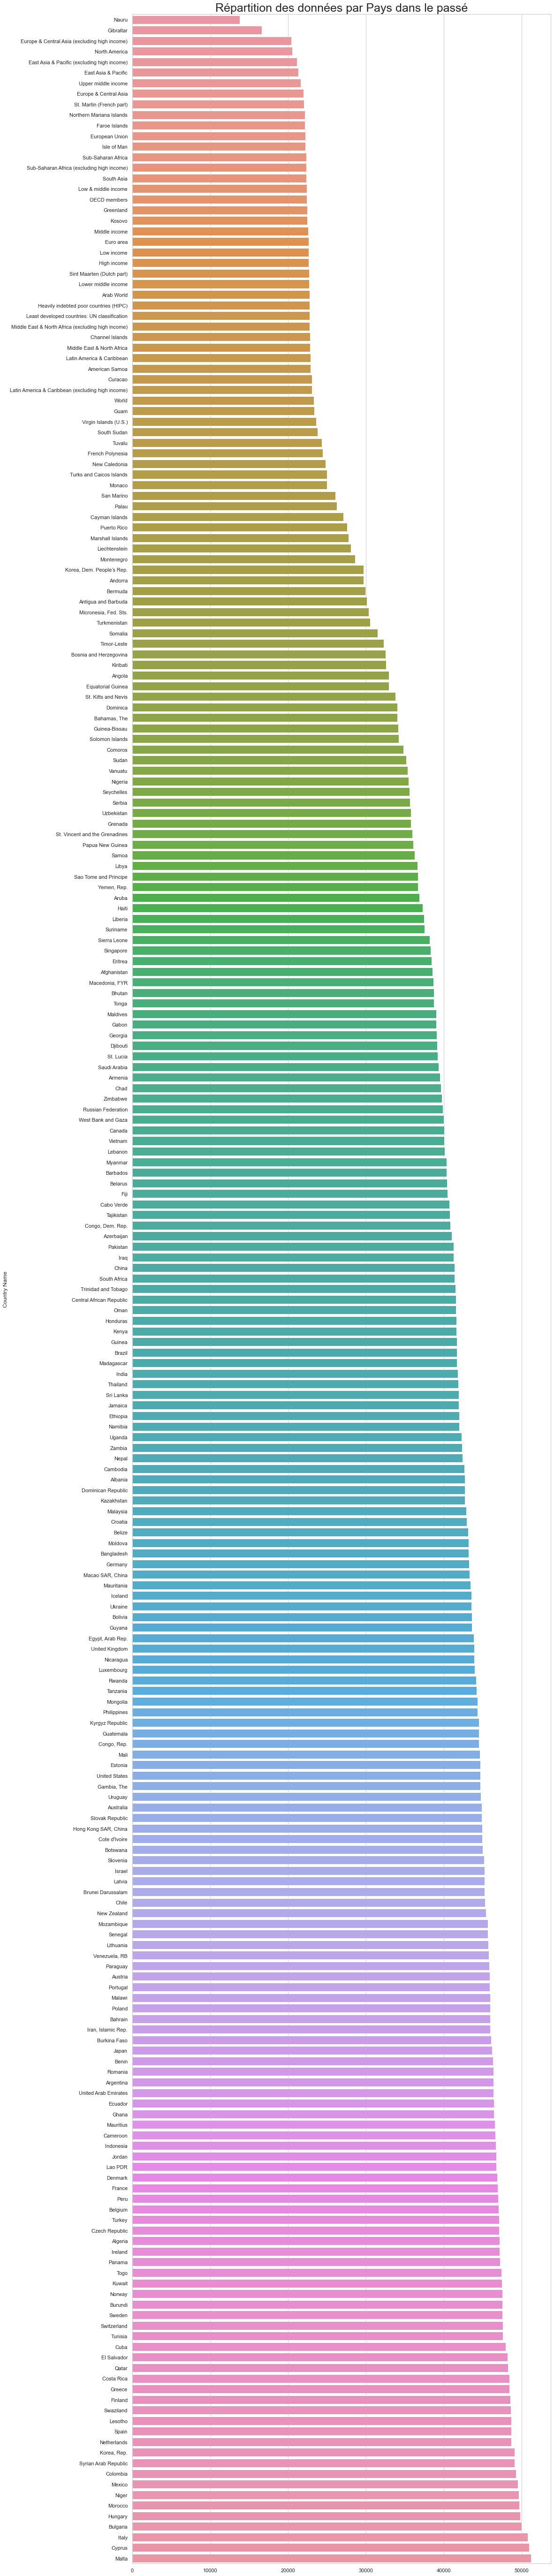

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 100))

plt.title('Répartition des données par Pays dans le passé', size=25)

plot = sns.barplot(x = df_merge_past.groupby('Country Name').count().sum(axis=1).sort_values().values, 
                   y = df_merge_past.groupby('Country Name').count().sum(axis=1).sort_values().index)
plt.show()

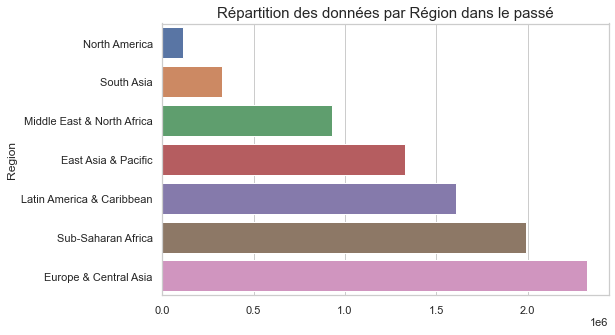

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

plt.title('Répartition des données par Région dans le passé', size=15)

plot = sns.barplot(x = df_merge_past.groupby('Region').count().sum(axis=1).sort_values().values, 
                   y = df_merge_past.groupby('Region').count().sum(axis=1).sort_values().index)
plt.show()

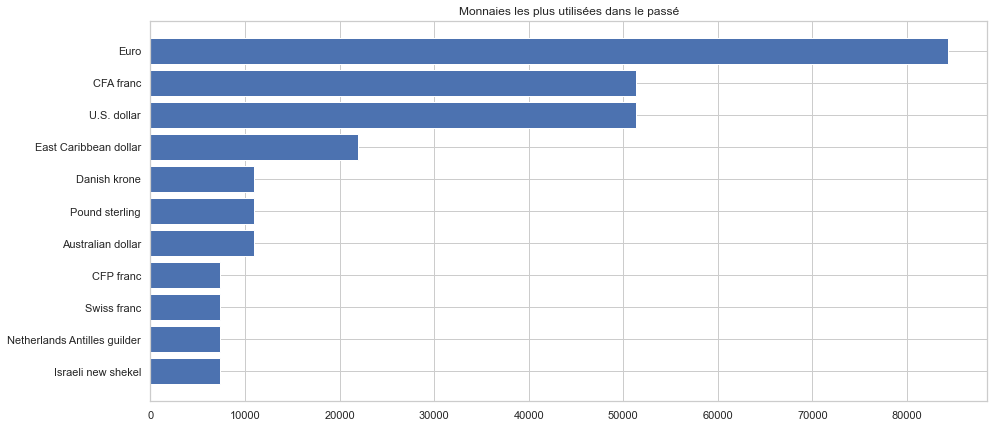

In [36]:
plt.figure(figsize=(15,7))
plt.barh(y = df_merge_past.groupby('Currency Unit')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Currency Unit'].tail(11), 
         width = df_merge_past.groupby('Currency Unit')[['Country Name']].count()['Country Name'].sort_values().tail(11))
plt.title('Monnaies les plus utilisées dans le passé')
plt.show()

### Analyse des données passés avec les indicateurs pertinents

In [37]:
df_merge_past['moyenne'] = df_merge_past.mean(axis=1)
df_merge_past['min'] = df_merge_past.min(axis=1)
df_merge_past['max'] = df_merge_past.max(axis=1)
df_merge_past['ecart_type'] = df_merge_past.std(axis = 1)

In [38]:
df_merge_past.head(3)

,Country Code,Country Name,Region,Currency Unit,Income Group,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,moyenne,min,max,ecart_type
0,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.332130,56.156502,45.716419,52.996460,49.965080,53.096840,59.058441,NaN,60.718788,60.643719,62.808041,NaN,78.047157,NaN,NaN,NaN,NaN,NaN,NaN,58.049052,45.716419,78.047157,9.837125
1,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.498428,59.691120,49.288391,59.051239,58.223461,57.107738,62.097809,NaN,65.384621,65.938301,68.178833,NaN,82.111633,NaN,NaN,NaN,NaN,NaN,NaN,62.870143,49.288391,82.111633,9.741913
2,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.187860,1.133350,1.169290,1.259030,1.399530,1.164840,1.109620,NaN,1.166480,1.189450,1.184040,NaN,1.108400,NaN,NaN,NaN,NaN,NaN,NaN,1.188354,1.108400,1.399530,0.094617


### Choix des indicateurs

Indicateurs sur la demographie d'acces à l'education : 
* Adjusted net enrolment rate, upper secondary, both sexes (%) => Taux de scolarisation ajusté au lycée 
* Total net enrolment rate, lower secondary, both sexes (%) => Taux net de scolarisation au collège
* Gross enrolment ratio, upper secondary, both sexes (%) => Taux brut de scolarisation au lycée
* Gross enrolment ratio, post-secondary non-tertiary, both sexes (%) => 
* Gross enrolment ratio, tertiary, both sexes (%)

Indicateurs sur la connectivité : 
* Internet users (per 100 people)
* Personal computers (per 100 people)
 
Indicateurs de richesse :
* GDP per capita (constant 2005 US$)

* GDP per capita, PPP (constant 2011 international $)

### Taux de remplissage des données passées par rapport aux indicateurs choisis

### Analyse des données manquantes dans le passé par rapport aux indicateurs choisis

In [39]:
df_merge_past.set_index('Indicator Name',inplace = True) #Index à enlever

In [40]:
df_merge_past_indicateur = df_merge_past.loc[["Adjusted net enrolment rate, upper secondary, both sexes (%)",
                    "Total net enrolment rate, lower secondary, both sexes (%)",
                    "Gross enrolment ratio, upper secondary, both sexes (%)",
                    "Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)",
                    "Gross enrolment ratio, tertiary, both sexes (%)",
                    "Internet users (per 100 people)","Personal computers (per 100 people)",
                    "GDP per capita (constant 2005 US$)",
                    "GDP per capita, PPP (constant 2011 international $)"]]

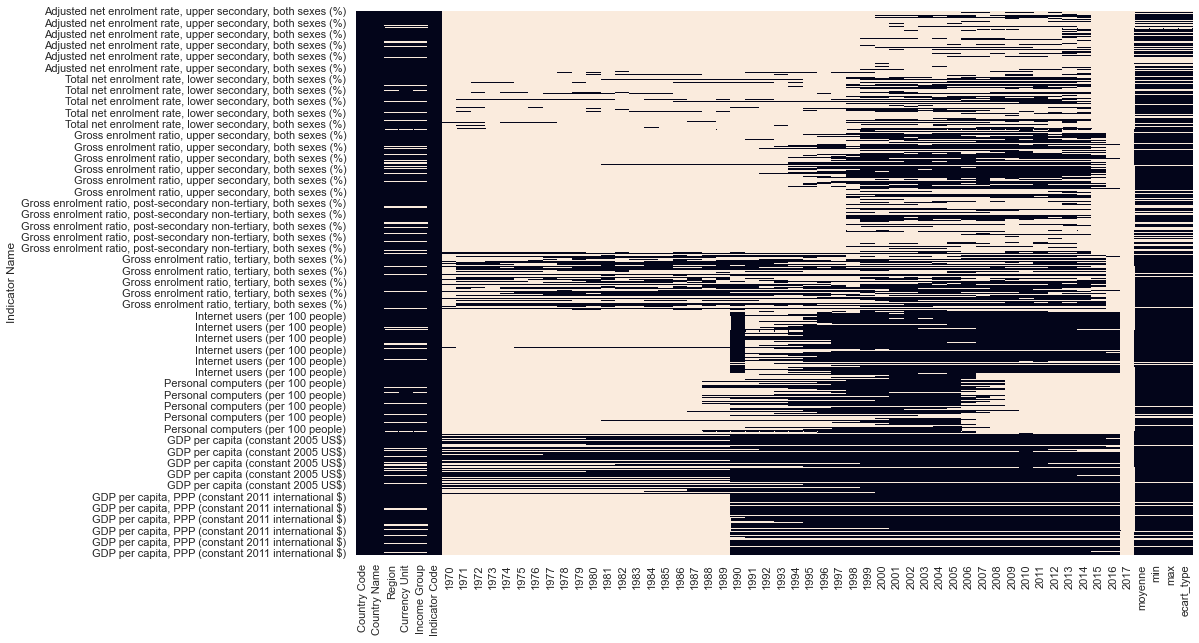

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df_merge_past_indicateur.isna(),cbar=False)

Les données sont pertinentes entre 1990 et 2016

Les données par indicateurs sur cette période sont plutôt bien remplies

On peut donc confirmer que les choix des indicateurs sont conformes

### Mise en place d'un dataset pour chaque indicateur par rapport à la moyenne

In [42]:
df_merge_past = df_merge_past.reset_index()

In [43]:
df_merge_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883265 entries, 0 to 883264
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Indicator Name  883265 non-null  object 
 1   Country Code    883265 non-null  object 
 2   Country Name    883265 non-null  object 
 3   Region          784310 non-null  object 
 4   Currency Unit   787975 non-null  object 
 5   Income Group    784310 non-null  object 
 6   Indicator Code  883265 non-null  object 
 7   1970            72278 non-null   float64
 8   1971            35508 non-null   float64
 9   1972            35594 non-null   float64
 10  1973            35514 non-null   float64
 11  1974            35708 non-null   float64
 12  1975            87268 non-null   float64
 13  1976            37445 non-null   float64
 14  1977            37562 non-null   float64
 15  1978            37564 non-null   float64
 16  1979            36771 non-null   float64
 17  1980      

In [44]:
df_merge_past_indic1 = df_merge_past[df_merge_past['Indicator Name'] == "Adjusted net enrolment rate, upper secondary, both sexes (%)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic2 = df_merge_past[df_merge_past['Indicator Name'] == "Total net enrolment rate, lower secondary, both sexes (%)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic3 = df_merge_past[df_merge_past['Indicator Name'] == "Gross enrolment ratio, upper secondary, both sexes (%)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic4 = df_merge_past[df_merge_past['Indicator Name'] == "Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic5 = df_merge_past[df_merge_past['Indicator Name'] == "Gross enrolment ratio, tertiary, both sexes (%)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic6 = df_merge_past[df_merge_past['Indicator Name'] == "Internet users (per 100 people)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic7 = df_merge_past[df_merge_past['Indicator Name'] == "Personal computers (per 100 people)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic8 = df_merge_past[df_merge_past['Indicator Name'] == "GDP per capita (constant 2005 US$)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 

df_merge_past_indic9 = df_merge_past[df_merge_past['Indicator Name'] == "GDP per capita, PPP (constant 2011 international $)"].sort_values(by ="moyenne", ascending = False).iloc[7:53, [2,3,55,56,57,58]] 


In [45]:
df_merge_past_indic2.head(10)

,Country Name,Region,moyenne,min,max,ecart_type
263305,France,Europe & Central Asia,99.150978,94.565170,99.996880,1.585984
604150,Norway,Europe & Central Asia,99.141884,97.737190,99.961472,0.758202
615145,New Zealand,East Asia & Pacific,98.951050,96.116570,99.942177,1.037511
351265,Hungary,Europe & Central Asia,98.789401,97.690620,99.936836,0.654016
725095,Serbia,Europe & Central Asia,98.769019,97.332268,99.783173,0.954211
835045,United States,North America,98.614243,93.608047,99.958740,1.714787
255975,Finland,Europe & Central Asia,98.573518,96.768478,99.986748,1.154977
578495,North America,NaN,98.521921,93.976242,99.955643,1.380736
201000,Denmark,Europe & Central Asia,98.437423,93.304161,99.863579,2.016954
43405,Australia,East Asia & Pacific,98.414156,97.254341,99.242928,0.618105


In [46]:
indice_indic_past = [df_merge_past_indic1,df_merge_past_indic2,df_merge_past_indic3,df_merge_past_indic4,
                 df_merge_past_indic5,df_merge_past_indic6,df_merge_past_indic7,df_merge_past_indic8,
                 df_merge_past_indic9]

index_indic_past = ["Adjusted net enrolment rate, upper secondary, both sexes (%)",
                    "Total net enrolment rate, lower secondary, both sexes (%)",
                    "Gross enrolment ratio, upper secondary, both sexes (%)",
                    "Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)",
                    "Gross enrolment ratio, tertiary, both sexes (%)",
                    "Internet users (per 100 people)","Personal computers (per 100 people)",
                    "GDP per capita (constant 2005 US$)",
                    "GDP per capita, PPP (constant 2011 international $)"]

### Analyse des indicateurs par Regions dans le passé

In [88]:
indice_indic_past[0]['Region'].unique()

array(['Europe & Central Asia', 'East Asia & Pacific', 'North America',
       'Latin America & Caribbean', 'Sub-Saharan Africa',
       'Middle East & North Africa', 'South Asia'], dtype=object)

None
None
None
None
None
None
None
None
None


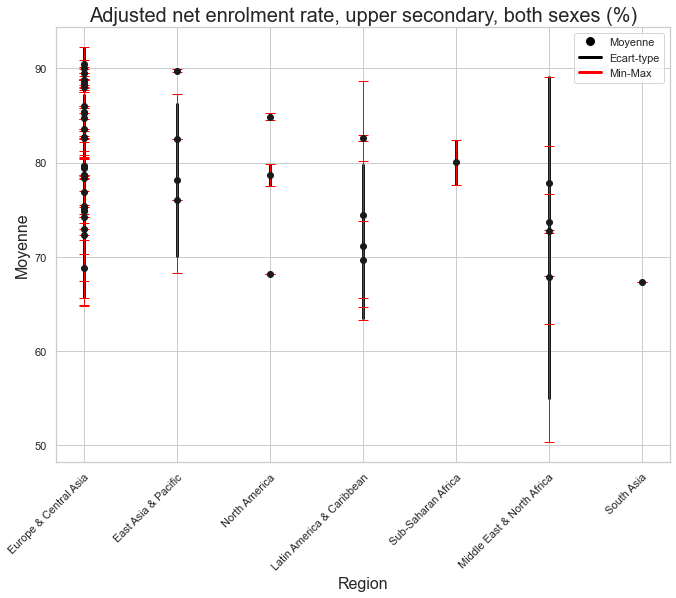

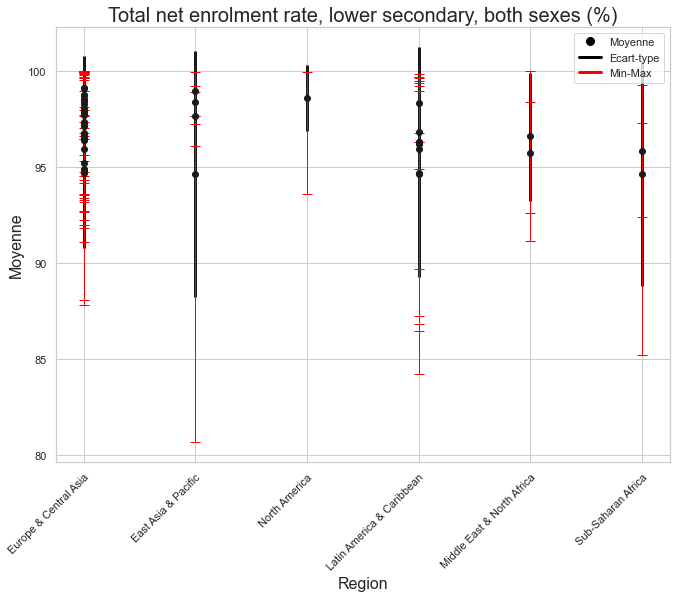

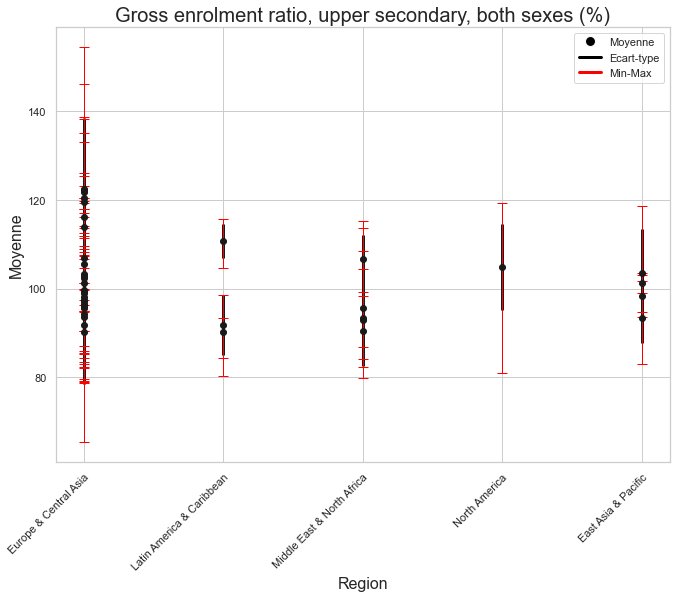

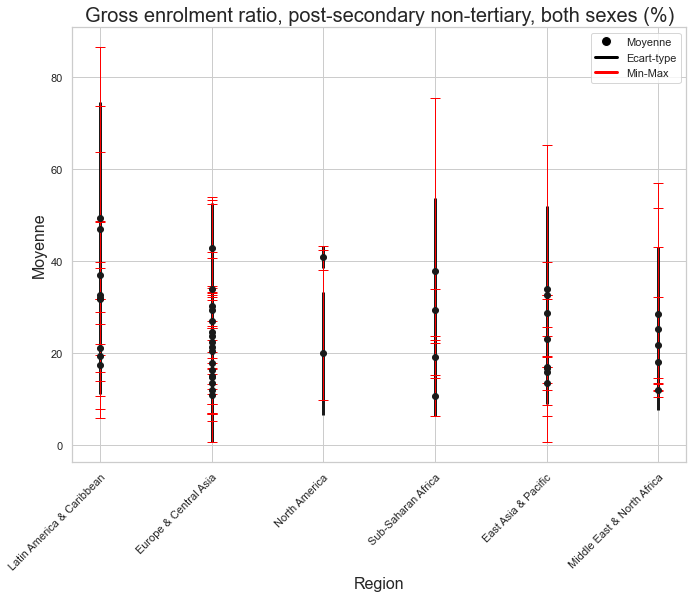

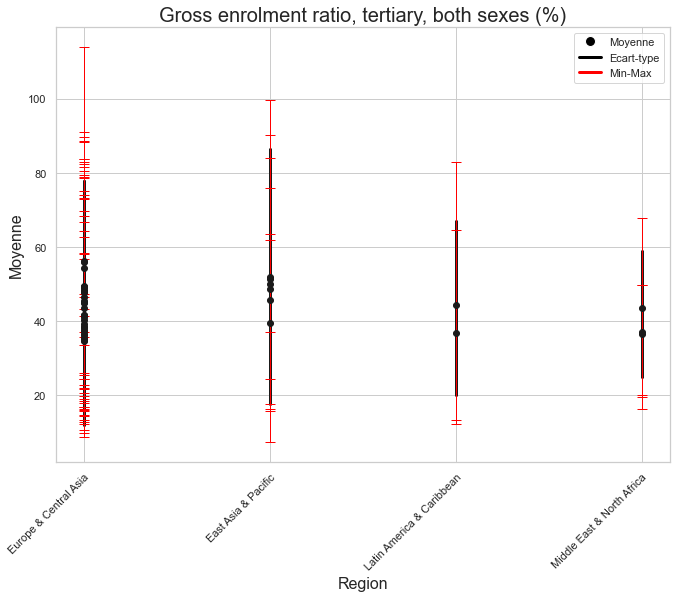

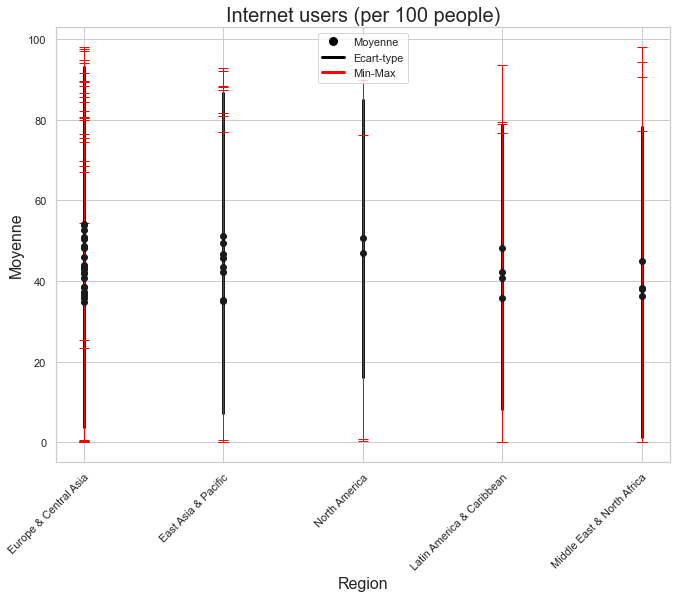

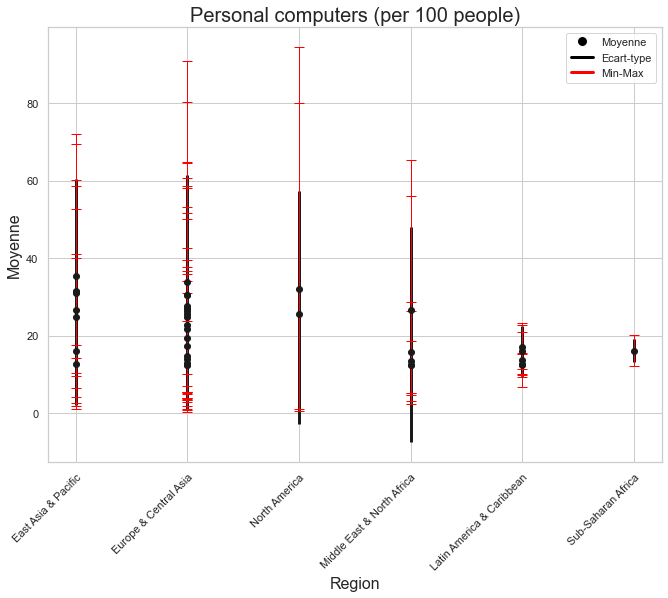

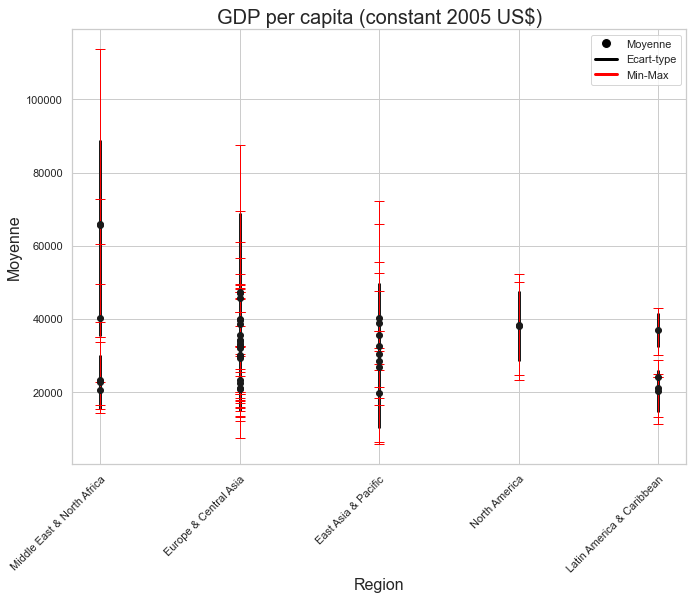

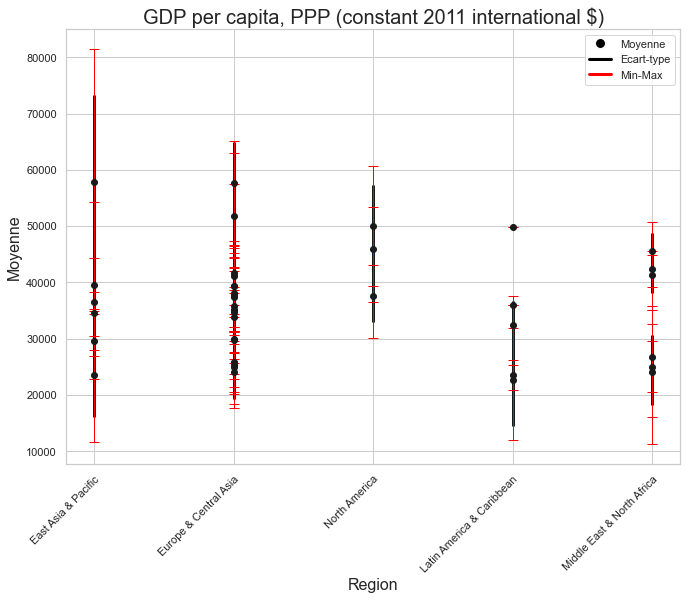

In [94]:
i = 0
n = 0
while n < 9 :
    print(plot_indic_region(indice_indic_past[i].dropna(),index_indic_past[i]))
    i = i+1
    n = n+1
    

### Analyse des indicteurs par Pays dans le passé

None
None
None
None
None
None
None
None
None


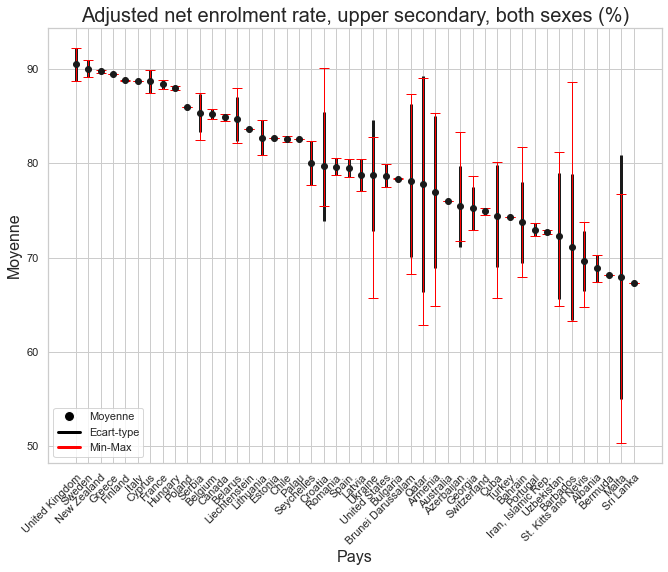

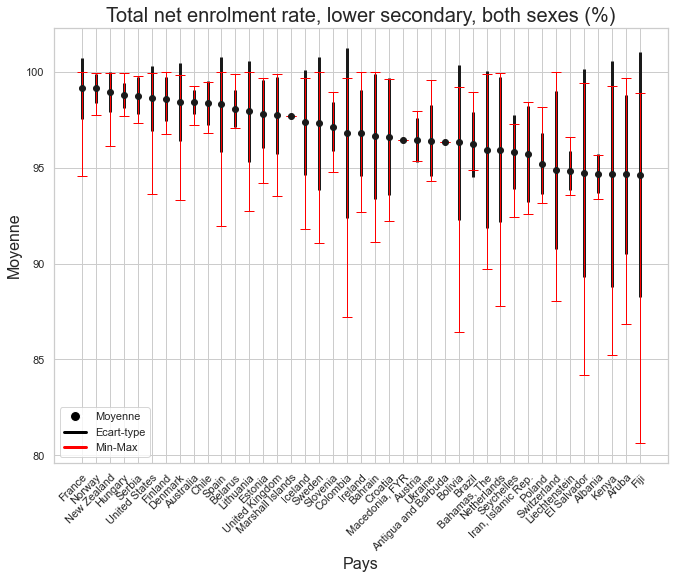

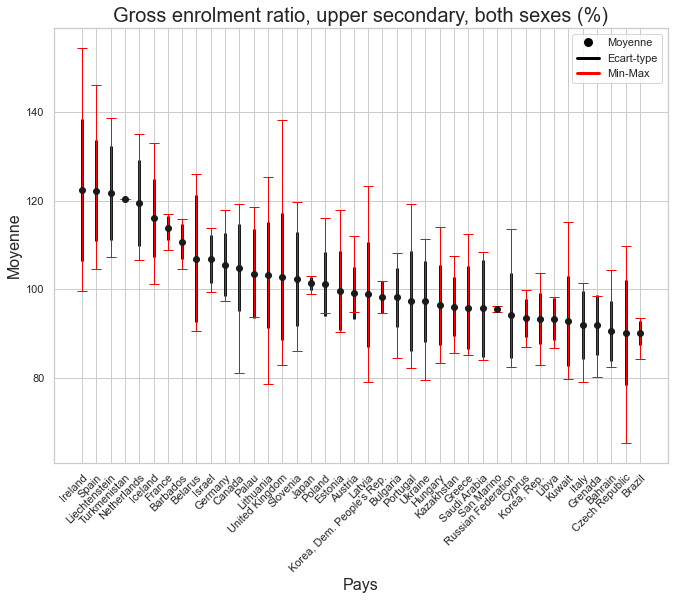

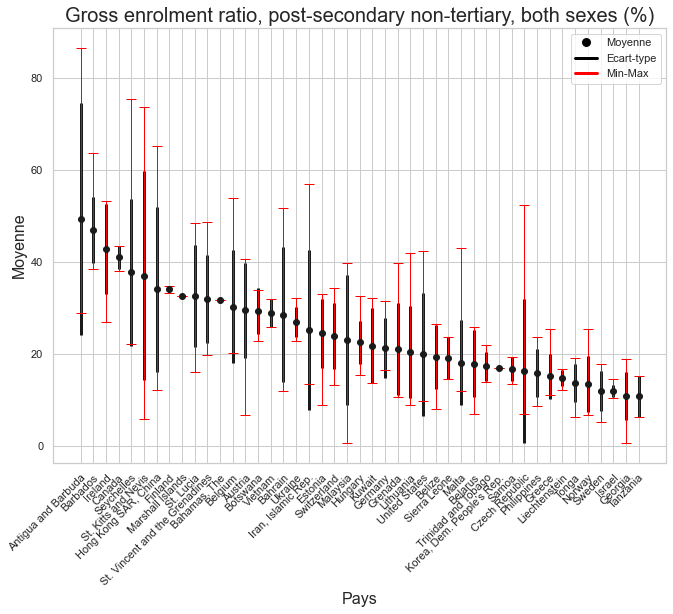

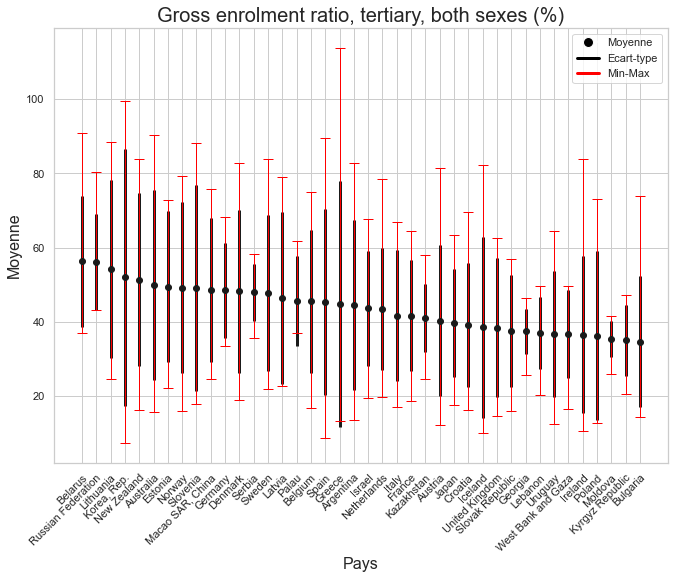

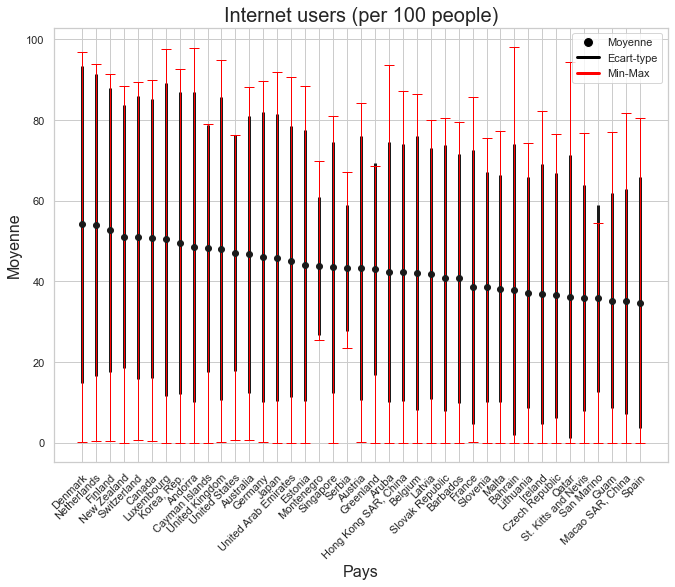

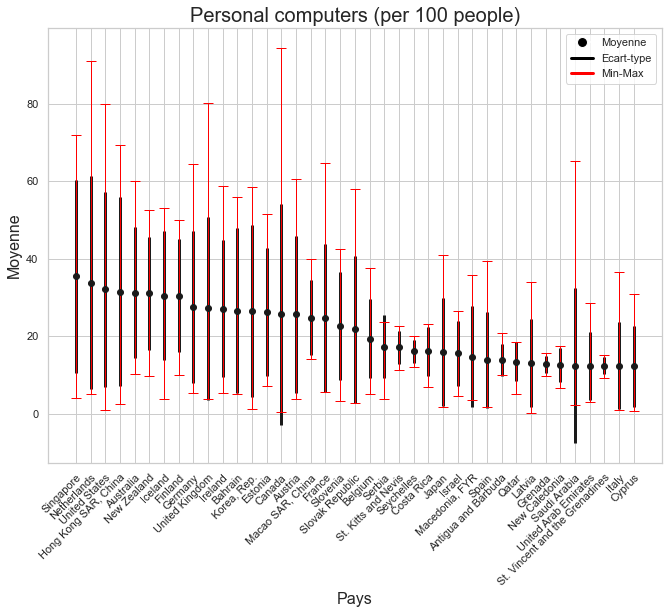

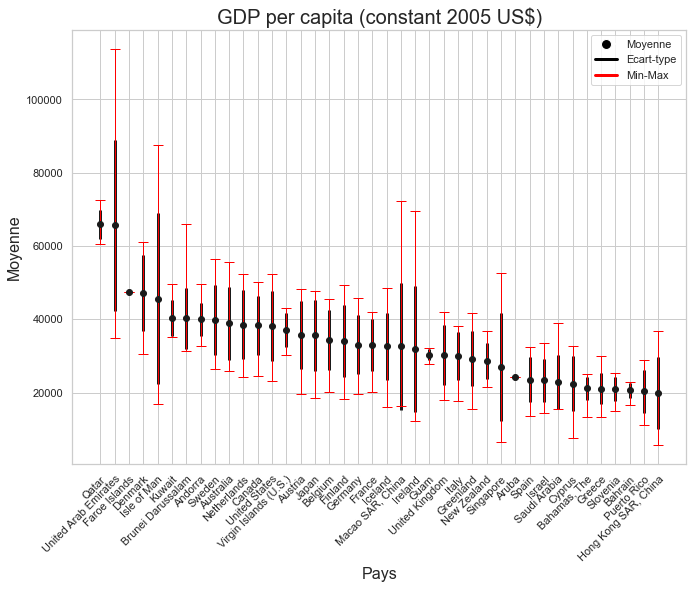

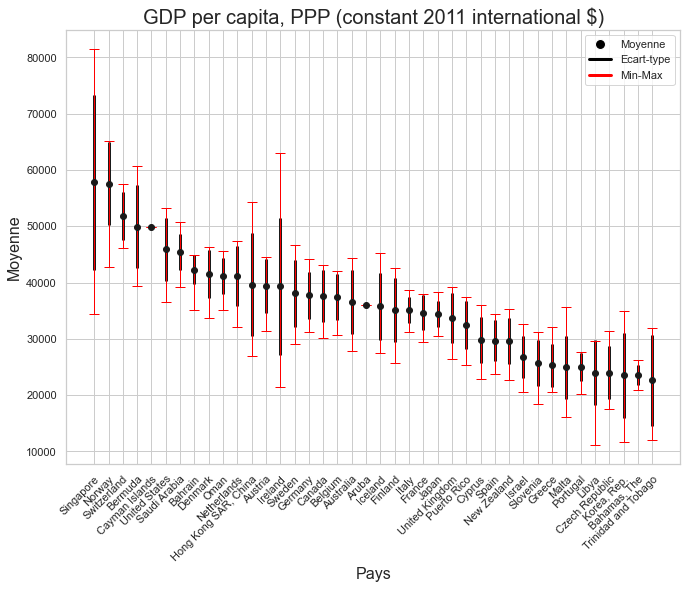

In [97]:
i = 0
n = 0
while n < 9 :
    print(plot_indic_pays(indice_indic_past[i].dropna(),index_indic_past[i]))
    i = i+1
    n = n+1
    
    

### Analyse des données futures

In [49]:
df_merge_future = pd.merge(country_clean,data_future, on = "Country Code")
df_merge_future.head(3)

,Country Code,Short Name,Currency Unit,Region,Income Group,Country Name,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_merge_future["Country Name"].nunique() == df_merge_future["Short Name"].nunique()

True

On peut donc retenir qu'une seule colonne pour désigner le nom du pays.

Nous allons donc supprimer la colonne 'Short Name'

In [51]:
df_merge_future = df_merge_future.copy().drop(['Short Name'],axis=1)

### Modification de l'ordre des colonnes des données futures

In [52]:
df_merge_future.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Code    883265 non-null  object 
 1   Currency Unit   787975 non-null  object 
 2   Region          784310 non-null  object 
 3   Income Group    784310 non-null  object 
 4   Country Name    883265 non-null  object 
 5   Indicator Name  883265 non-null  object 
 6   Indicator Code  883265 non-null  object 
 7   2020            51436 non-null   float64
 8   2025            51436 non-null   float64
 9   2030            51436 non-null   float64
 10  2035            51436 non-null   float64
 11  2040            51436 non-null   float64
 12  2045            51436 non-null   float64
 13  2050            51436 non-null   float64
 14  2055            51436 non-null   float64
 15  2060            51436 non-null   float64
 16  2065            51436 non-null   float64
 17  2070      

In [53]:
(df_merge_future.isna().sum()/df_merge_future.shape[0]).sort_values()

Country Code      0.000000
Country Name      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
Currency Unit     0.107884
Region            0.112033
Income Group      0.112033
2090              0.941766
2085              0.941766
2080              0.941766
2075              0.941766
2070              0.941766
2065              0.941766
2060              0.941766
2040              0.941766
2050              0.941766
2045              0.941766
2095              0.941766
2035              0.941766
2030              0.941766
2025              0.941766
2020              0.941766
2055              0.941766
2100              0.941766
dtype: float64

In [54]:
cols_future = list(df_merge_future.columns)
df_merge_future = df_merge_future[[cols_future[0]] + [cols_future[4]] 
                                  + [cols_future[2]] + [cols_future[1]] 
                                  + [cols_future[3]] + cols_future[5:]]

In [55]:
df_merge_future.head(3)

,Country Code,Country Name,Region,Currency Unit,Income Group,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse des données futures avant nettoyage

<BarContainer object of 17 artists>

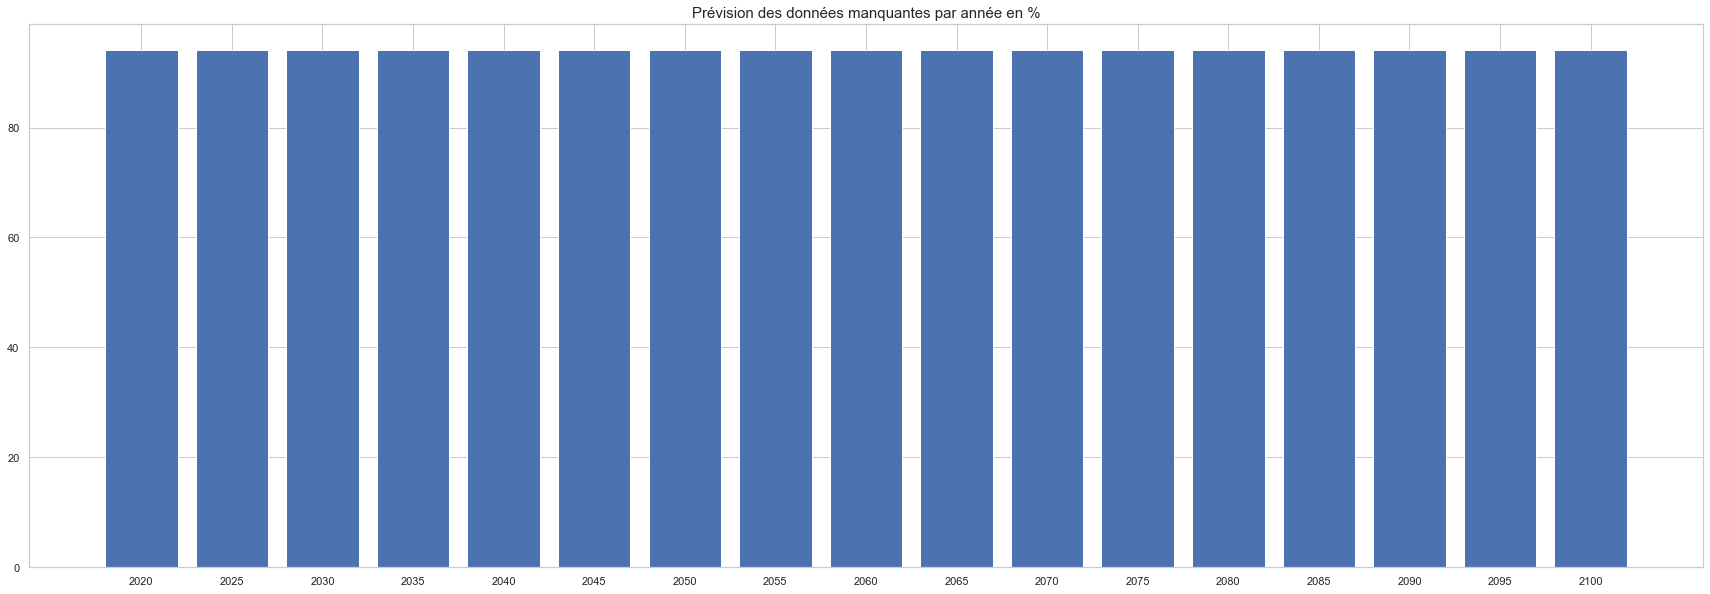

In [56]:
fig = plt.figure(figsize=((30,10)))
annees = df_merge_future.columns[7:]

x_label = [m_str for m_str in annees ] #boucle 

y = (df_merge_future[annees].isna().sum()/df_merge_future.shape[0])*100

plt.title('Prévision des données manquantes par année en %', size= 15)

plt.bar(x_label,y)

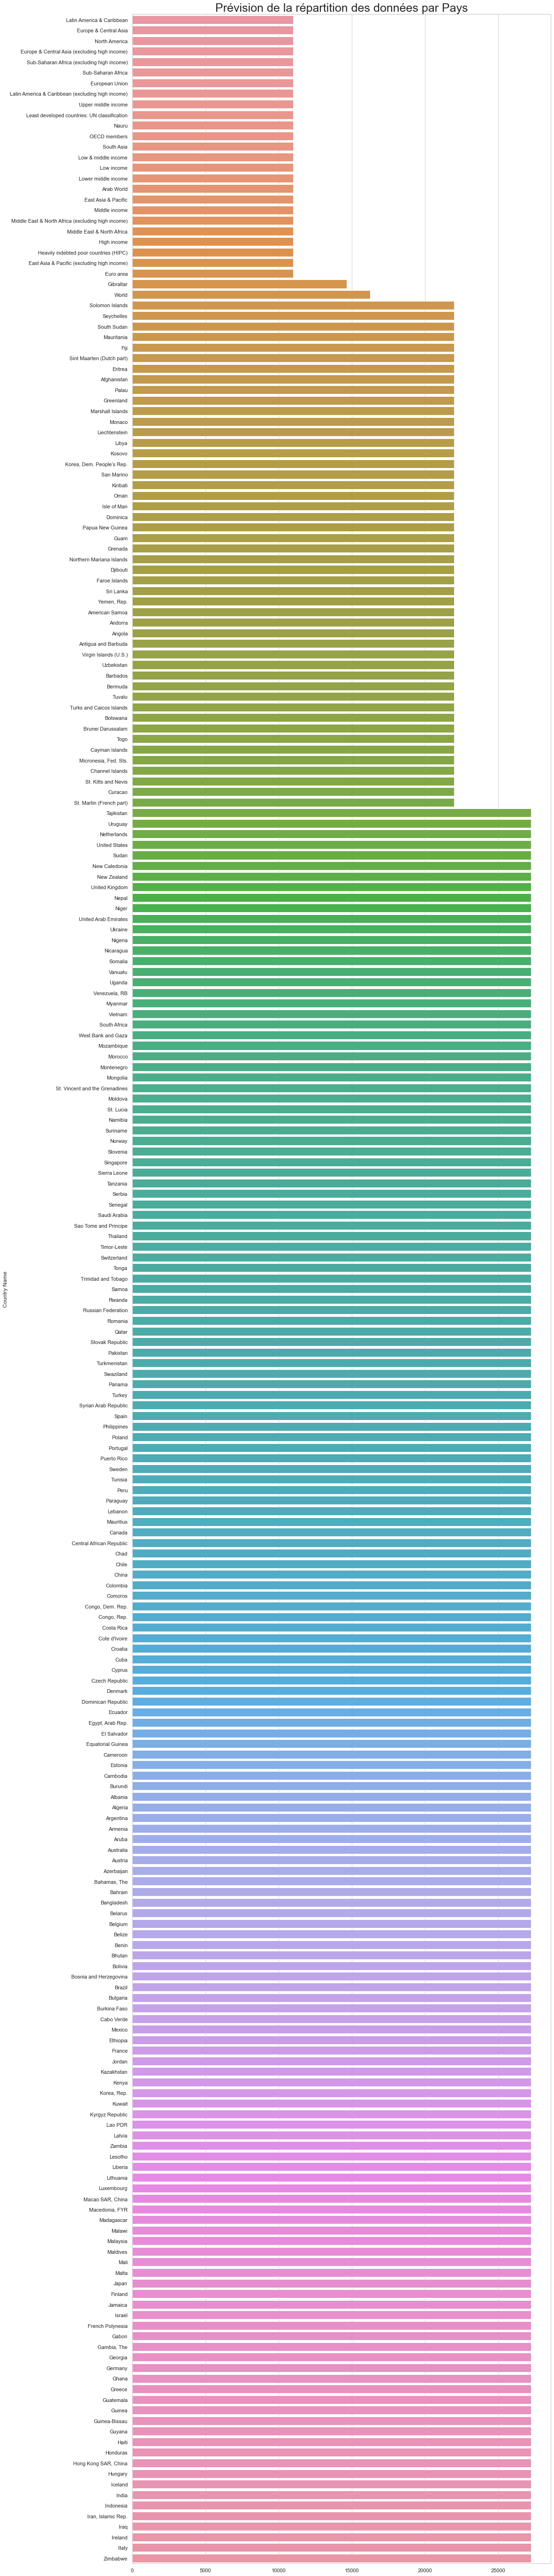

In [57]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 100))

plt.title('Prévision de la répartition des données par Pays', size=25)

plot = sns.barplot(x = df_merge_future.groupby('Country Name').count().sum(axis=1).sort_values().values, 
                   y = df_merge_future.groupby('Country Name').count().sum(axis=1).sort_values().index)
plt.show()

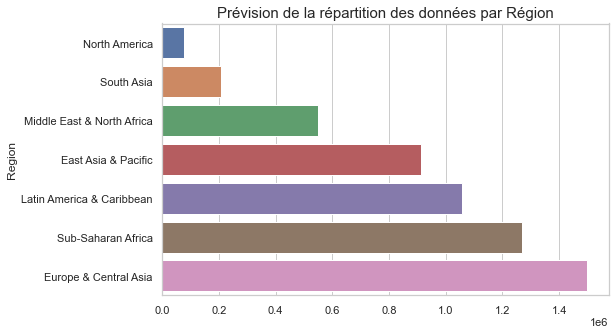

In [58]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

plt.title('Prévision de la répartition des données par Région', size=15)

plot = sns.barplot(x = df_merge_future.groupby('Region').count().sum(axis=1).sort_values().values, 
                   y = df_merge_future.groupby('Region').count().sum(axis=1).sort_values().index)
plt.show()

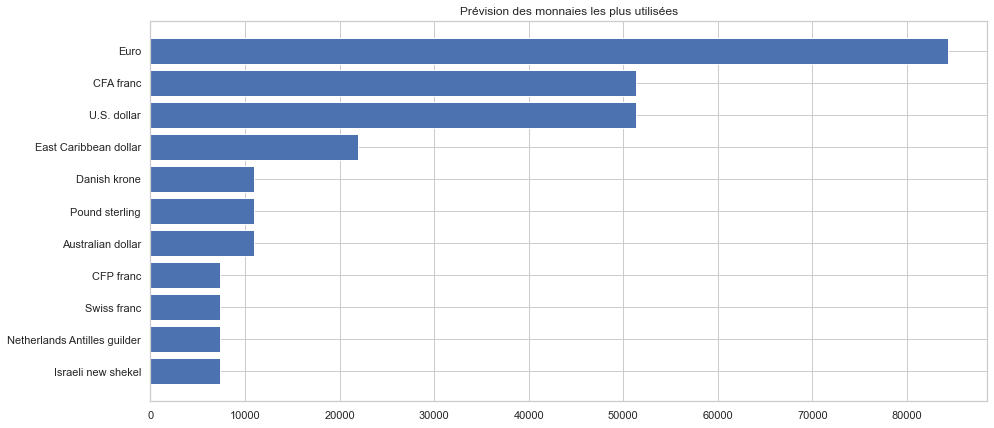

In [59]:
plt.figure(figsize=(15,7))
plt.barh(y = df_merge_future.groupby('Currency Unit')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Currency Unit'].tail(11), 
         width = df_merge_future.groupby('Currency Unit')[['Country Name']].count()['Country Name'].sort_values().tail(11))
plt.title('Prévision des monnaies les plus utilisées')
plt.show()

In [60]:
df_merge_future.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Code    883265 non-null  object 
 1   Country Name    883265 non-null  object 
 2   Region          784310 non-null  object 
 3   Currency Unit   787975 non-null  object 
 4   Income Group    784310 non-null  object 
 5   Indicator Name  883265 non-null  object 
 6   Indicator Code  883265 non-null  object 
 7   2020            51436 non-null   float64
 8   2025            51436 non-null   float64
 9   2030            51436 non-null   float64
 10  2035            51436 non-null   float64
 11  2040            51436 non-null   float64
 12  2045            51436 non-null   float64
 13  2050            51436 non-null   float64
 14  2055            51436 non-null   float64
 15  2060            51436 non-null   float64
 16  2065            51436 non-null   float64
 17  2070      

Ici nous voyons qu'il manque la même quantité de données pour chaque année. 

Nous allons donc supprimer les données manquantes pour chaque année.

In [61]:
df_merge_future.dropna(inplace = True, axis=0) #Ensuite supprimer le NA

In [62]:
df_merge_future.head(3)

,Country Code,Country Name,Region,Currency Unit,Income Group,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
3349,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,Wittgenstein Projection: Mean years of schooling. Age 0-19. Female,PRJ.MYS.0T19.FE,2.3,2.2,2.1,2.2,2.4,2.5,2.4,2.3,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.4,2.4
3350,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,Wittgenstein Projection: Mean years of schooling. Age 0-19. Male,PRJ.MYS.0T19.MA,2.2,2.1,2.0,2.2,2.3,2.4,2.4,2.3,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.4,2.4
3351,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,Wittgenstein Projection: Mean years of schooling. Age 0-19. Total,PRJ.MYS.0T19.MF,2.3,2.2,2.1,2.2,2.4,2.4,2.4,2.3,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.4,2.4


In [63]:
df_merge_future.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51128 entries, 3349 to 883256
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    51128 non-null  object 
 1   Country Name    51128 non-null  object 
 2   Region          51128 non-null  object 
 3   Currency Unit   51128 non-null  object 
 4   Income Group    51128 non-null  object 
 5   Indicator Name  51128 non-null  object 
 6   Indicator Code  51128 non-null  object 
 7   2020            51128 non-null  float64
 8   2025            51128 non-null  float64
 9   2030            51128 non-null  float64
 10  2035            51128 non-null  float64
 11  2040            51128 non-null  float64
 12  2045            51128 non-null  float64
 13  2050            51128 non-null  float64
 14  2055            51128 non-null  float64
 15  2060            51128 non-null  float64
 16  2065            51128 non-null  float64
 17  2070            51128 non-n

Au départ nous avions 883 265 lignes.

Après suppression des données manquantes, nous avons désormais 51 128 lignes.

Parmi ces lignes il n'y a aucune données manquantes pour chaque année.

### Analyse des données futures avec les indicateurs pertinents

In [64]:
df_merge_future['moyenne'] = df_merge_future.mean(axis=1)
df_merge_future['min'] = df_merge_future.min(axis=1)
df_merge_future['max'] = df_merge_future.max(axis=1)
df_merge_future['ecart_type'] = df_merge_future.std(axis = 1)

In [65]:
df_merge_future.head(3)

,Country Code,Country Name,Region,Currency Unit,Income Group,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,moyenne,min,max,ecart_type
3349,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,Wittgenstein Projection: Mean years of schooling. Age 0-19. Female,PRJ.MYS.0T19.FE,2.3,2.2,2.1,2.2,2.4,2.5,2.4,2.3,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.341176,2.1,2.5,0.113376
3350,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,Wittgenstein Projection: Mean years of schooling. Age 0-19. Male,PRJ.MYS.0T19.MA,2.2,2.1,2.0,2.2,2.3,2.4,2.4,2.3,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.311765,2.0,2.4,0.133797
3351,ABW,Aruba,Latin America & Caribbean,Aruban florin,High income: nonOECD,Wittgenstein Projection: Mean years of schooling. Age 0-19. Total,PRJ.MYS.0T19.MF,2.3,2.2,2.1,2.2,2.4,2.4,2.4,2.3,2.3,2.3,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.335294,2.1,2.4,0.101804


### Choix des indicateurs pour le futur

In [66]:
df_merge_future['Indicator Name'].nunique()

308

In [67]:
df_merge_future['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

Sur un total de 308 indicateurs on retrouve nottament des informations sur l'éducation par rapport à l'âge et au niveau d'étude

Proposition d'indicateurs pour le futur : 
* 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total'
* 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total'
* 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total'
* 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total'
* 'Wittgenstein Projection: Mean years of schooling. Age 15+. Total'


### Taux de remplissage des données futures par rapport aux indicateurs choisis

In [68]:
df_merge_future.set_index('Indicator Name',inplace=True)

In [69]:
df_merge_future_indicateur = df_merge_future.loc[['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total',
                     'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total',
                     'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total',
                     'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total',
                     'Wittgenstein Projection: Mean years of schooling. Age 15+. Total']]

### Mise en place d'un dataset pour chaque indicateur par rapport à la moyenne

In [70]:
df_merge_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51128 entries, Wittgenstein Projection: Mean years of schooling. Age 0-19. Female to Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    51128 non-null  object 
 1   Country Name    51128 non-null  object 
 2   Region          51128 non-null  object 
 3   Currency Unit   51128 non-null  object 
 4   Income Group    51128 non-null  object 
 5   Indicator Code  51128 non-null  object 
 6   2020            51128 non-null  float64
 7   2025            51128 non-null  float64
 8   2030            51128 non-null  float64
 9   2035            51128 non-null  float64
 10  2040            51128 non-null  float64
 11  2045            51128 non-null  float64
 12  2050            51128 non-null  float64
 13  2055            51128 non-null  float64
 

In [71]:
df_merge_future = df_merge_future.reset_index()

In [72]:
df_merge_future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51128 entries, 0 to 51127
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  51128 non-null  object 
 1   Country Code    51128 non-null  object 
 2   Country Name    51128 non-null  object 
 3   Region          51128 non-null  object 
 4   Currency Unit   51128 non-null  object 
 5   Income Group    51128 non-null  object 
 6   Indicator Code  51128 non-null  object 
 7   2020            51128 non-null  float64
 8   2025            51128 non-null  float64
 9   2030            51128 non-null  float64
 10  2035            51128 non-null  float64
 11  2040            51128 non-null  float64
 12  2045            51128 non-null  float64
 13  2050            51128 non-null  float64
 14  2055            51128 non-null  float64
 15  2060            51128 non-null  float64
 16  2065            51128 non-null  float64
 17  2070            51128 non-null 

In [73]:
df_merge_future_indic1 = df_merge_future[df_merge_future['Indicator Name'] == 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total'].sort_values(by ="moyenne", ascending = False).iloc[7:22, [2,3,24,25,26,27]] 

df_merge_future_indic2 = df_merge_future[df_merge_future['Indicator Name'] == 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total'].sort_values(by ="moyenne", ascending = False).iloc[7:22, [2,3,24,25,26,27]] 

df_merge_future_indic3 = df_merge_future[df_merge_future['Indicator Name'] == 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total'].sort_values(by ="moyenne", ascending = False).iloc[7:22, [2,3,24,25,26,27]] 

df_merge_future_indic4 = df_merge_future[df_merge_future['Indicator Name'] == 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total'].sort_values(by ="moyenne", ascending = False).iloc[7:22, [2,3,24,25,26,27]] 

df_merge_future_indic5 = df_merge_future[df_merge_future['Indicator Name'] == 'Wittgenstein Projection: Mean years of schooling. Age 15+. Total'].sort_values(by ="moyenne", ascending = False).iloc[7:22, [2,3,24,25,26,27]] 


In [74]:
df_merge_future_indic3

,Country Name,Region,moyenne,min,max,ecart_type
27025,Lithuania,Europe & Central Asia,0.510588,0.39,0.61,0.074231
3001,Belgium,Europe & Central Asia,0.488235,0.31,0.62,0.104848
18709,"Hong Kong SAR, China",East Asia & Pacific,0.466471,0.25,0.65,0.135700
37189,Puerto Rico,Latin America & Caribbean,0.460000,0.27,0.62,0.118111
43657,Sweden,Europe & Central Asia,0.449412,0.31,0.57,0.090103
39961,Saudi Arabia,Middle East & North Africa,0.440588,0.21,0.62,0.139231
21789,Iceland,Europe & Central Asia,0.438235,0.29,0.56,0.091252
27949,"Macao SAR, China",East Asia & Pacific,0.434706,0.21,0.62,0.141230
15013,France,Europe & Central Asia,0.431176,0.23,0.59,0.122040
34725,Norway,Europe & Central Asia,0.429412,0.27,0.56,0.095067


### Analyse des indicateurs par pays dans le future

In [75]:
indice_indic_future = [df_merge_future_indic1,df_merge_future_indic2,df_merge_future_indic3,
                       df_merge_future_indic4, df_merge_future_indic5]

index_indic_future = ['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total',
                     'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total',
                     'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total',
                     'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total',
                     'Wittgenstein Projection: Mean years of schooling. Age 15+. Total']

None
None
None
None
None


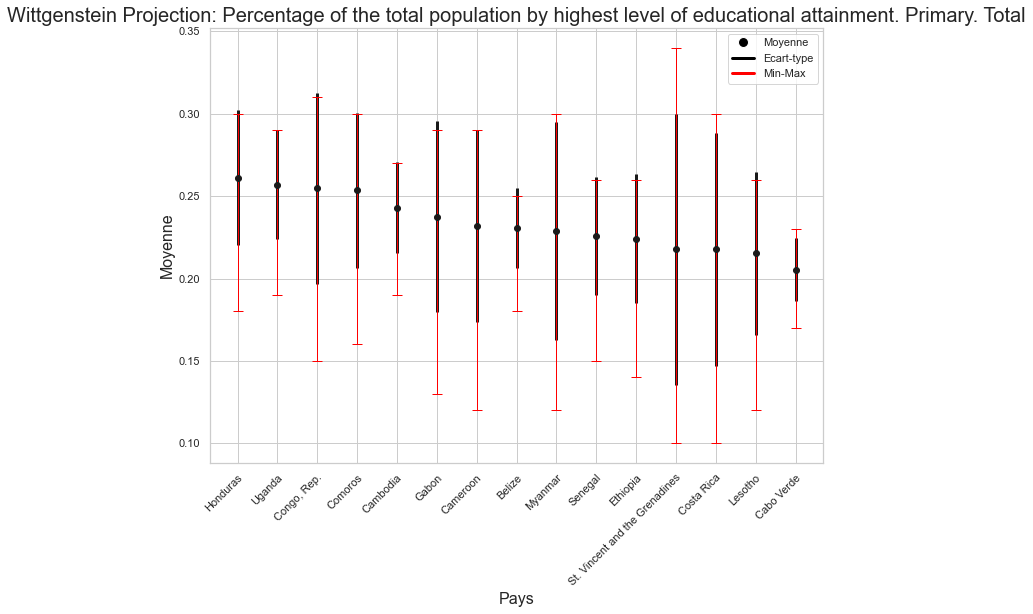

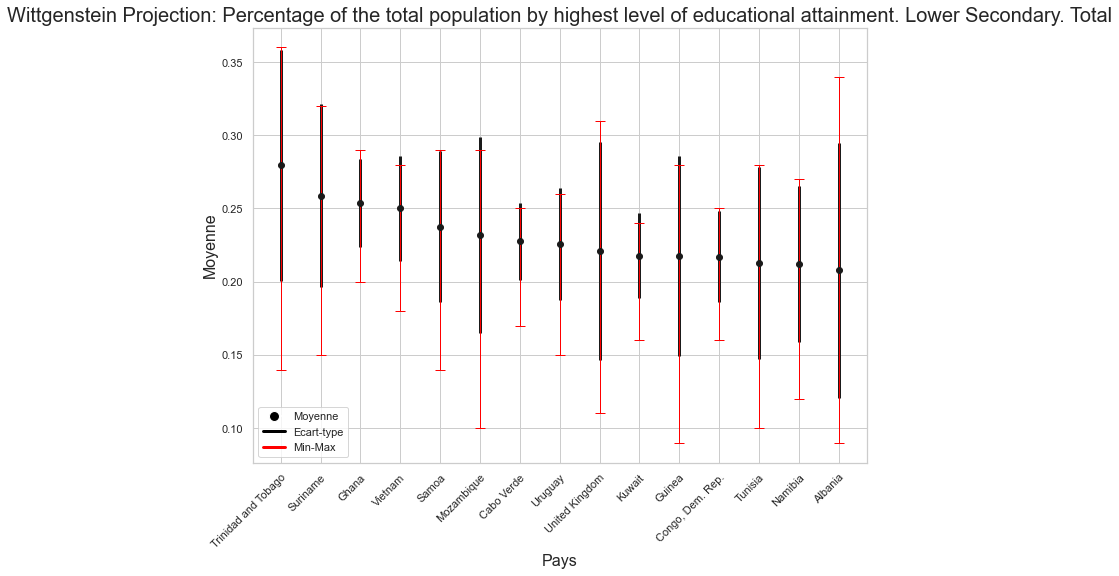

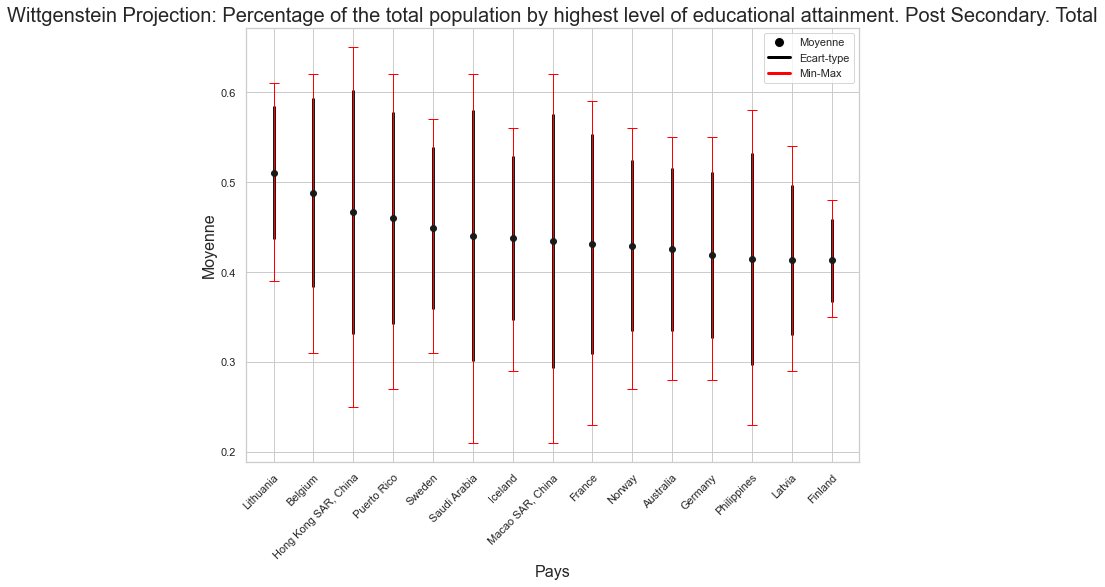

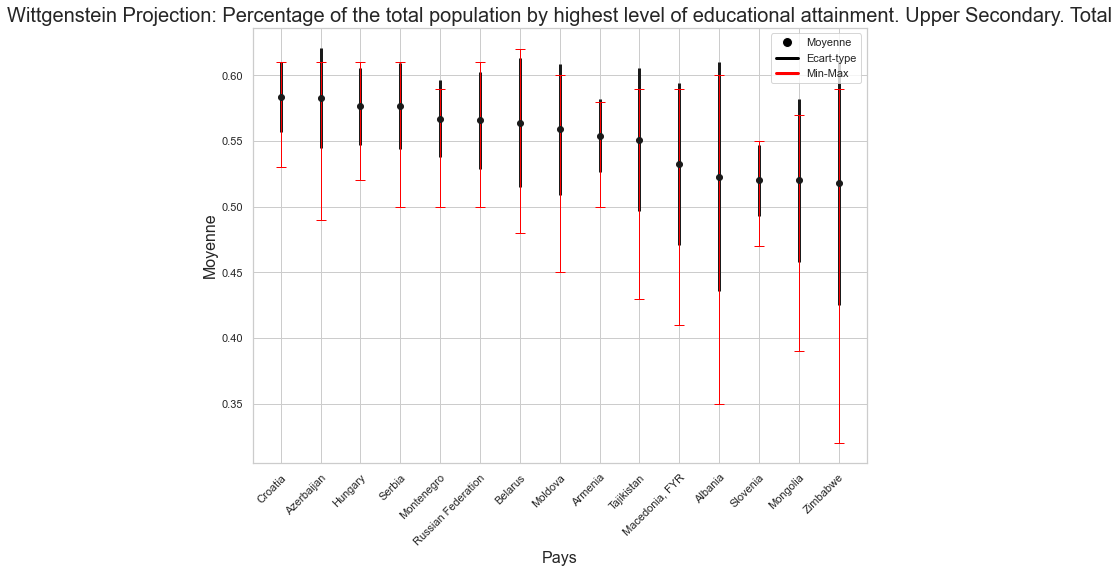

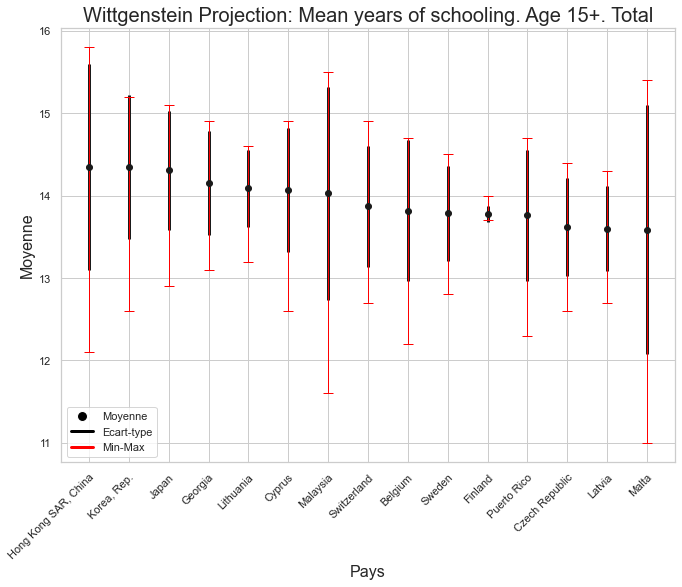

In [76]:
i = 0
n = 0
while n < 5 :
    print(plot_indic_pays(indice_indic_future[i],index_indic_future[i]))
    i = i+1
    n = n+1
    
    

### Analyse des indicateurs par régions dans le future

None
None
None
None
None


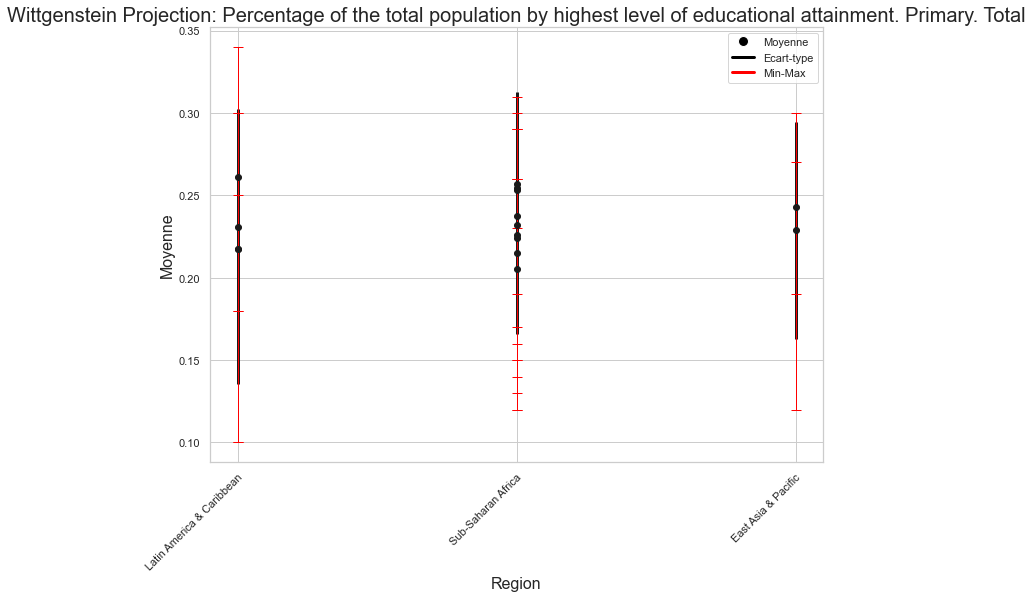

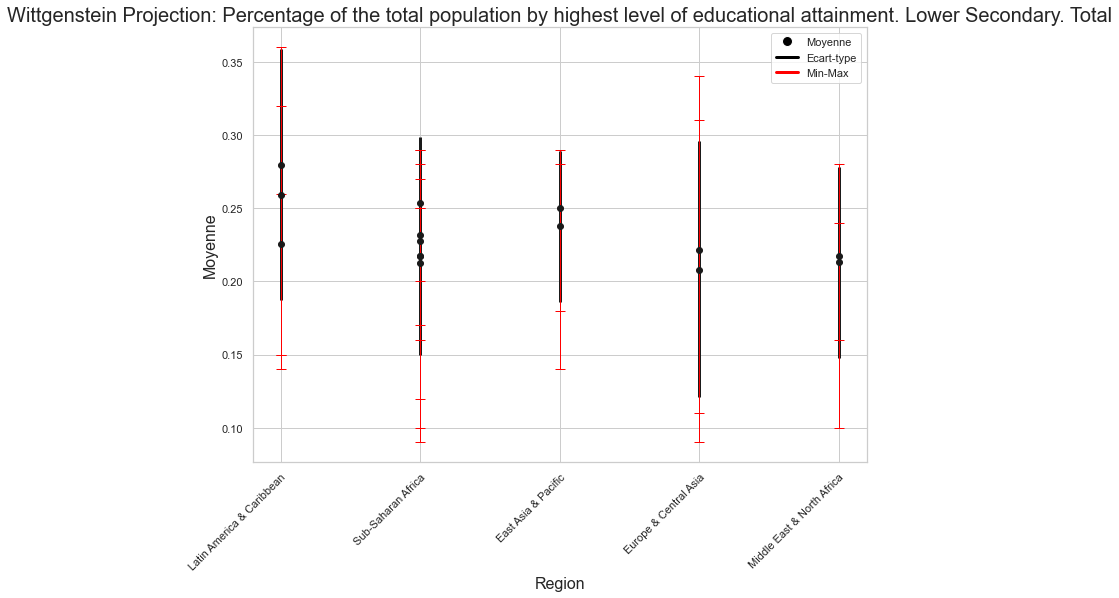

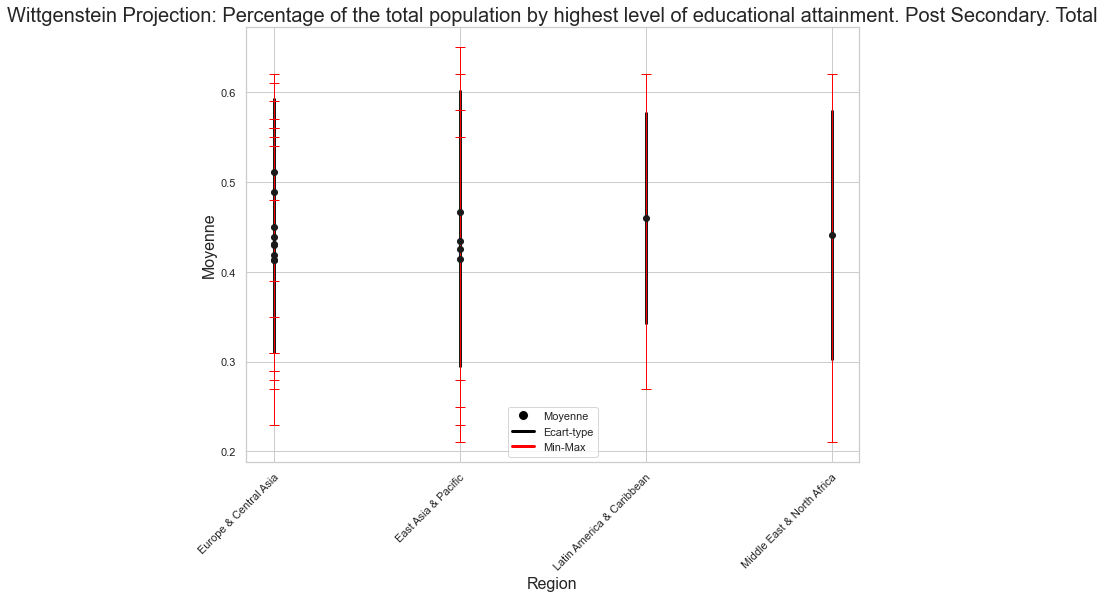

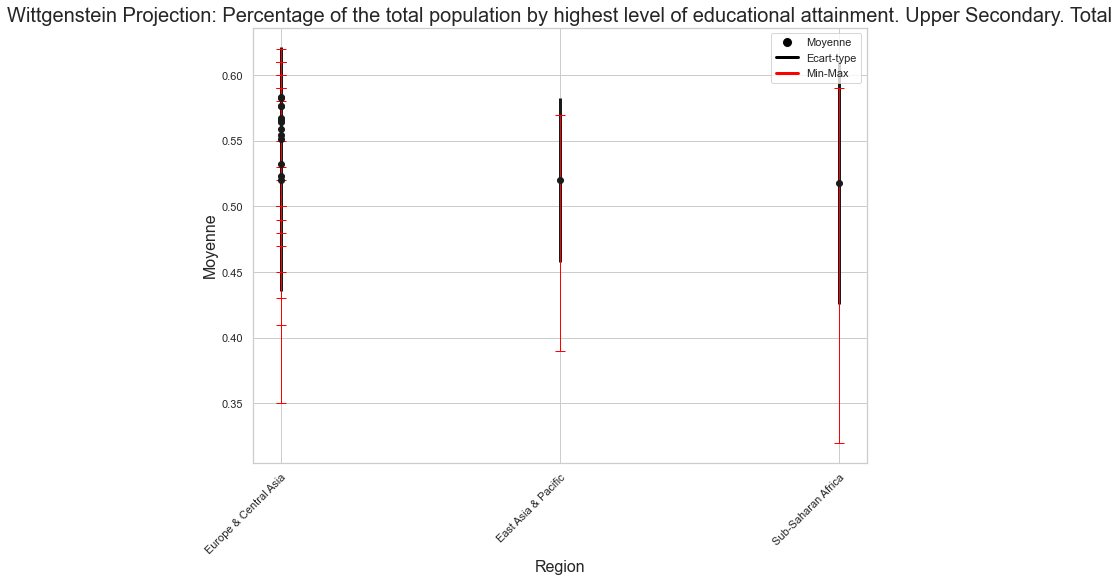

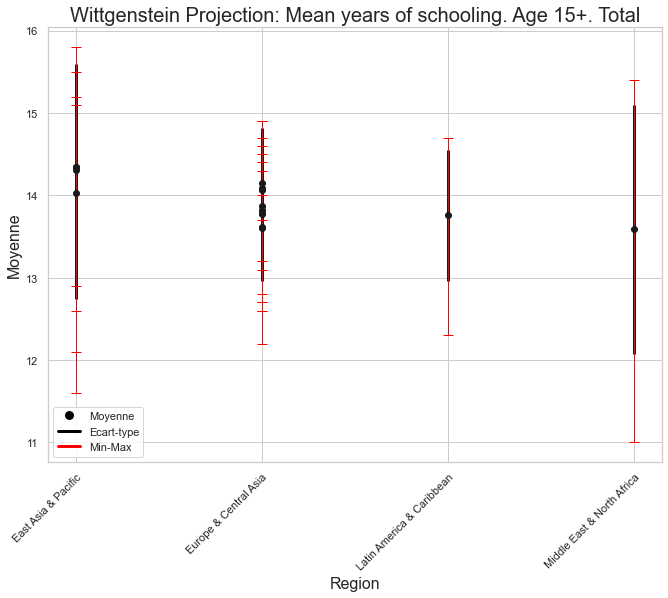

In [77]:
i = 0
n = 0
while n < 5 :
    print(plot_indic_region(indice_indic_future[i],index_indic_future[i]))
    i = i+1
    n = n+1
    

### Classement complet sur les pays pertinents 

In [151]:
i = 0
n = 0
liste_pays_passe = []

while n < 9 :
    liste_pays_passe = liste_pays_passe + indice_indic_past[i]['Country Name'].head(10).tolist()
    i = i+1
    n = n+1

i = 0
n = 0
liste_pays_future = []

while n < 5 :
    liste_pays_future = liste_pays_future + indice_indic_future[i]['Country Name'].head(10).tolist()
    i = i+1
    n = n+1
    
liste_pays = liste_pays_passe + liste_pays_future


In [152]:
Counter(liste_pays)


Counter({'United Kingdom': 2,
         'Sweden': 4,
         'New Zealand': 5,
         'Greece': 1,
         'Finland': 5,
         'Italy': 1,
         'Cyprus': 2,
         'France': 4,
         'Hungary': 3,
         'Poland': 1,
         'Norway': 4,
         'Serbia': 2,
         'United States': 3,
         'North America': 3,
         'Denmark': 4,
         'Australia': 4,
         'Ireland': 2,
         'Spain': 1,
         'Liechtenstein': 1,
         'Turkmenistan': 1,
         'Netherlands': 3,
         'Iceland': 3,
         'Barbados': 2,
         'Belarus': 3,
         'Israel': 1,
         'Antigua and Barbuda': 1,
         'Canada': 2,
         'Seychelles': 1,
         'St. Kitts and Nevis': 1,
         'Hong Kong SAR, China': 4,
         'Marshall Islands': 1,
         'St. Lucia': 1,
         'Russian Federation': 2,
         'Lithuania': 3,
         'Korea, Rep.': 3,
         'Estonia': 1,
         'Slovenia': 1,
         'Macao SAR, China': 2,
         'Switzerlan

### Classement complet sur les Régions pertinentes

In [149]:
i = 0
n = 0
liste_regions_passe = []

while n < 9 :
    liste_regions_passe = liste_regions_passe + indice_indic_past[i]['Region'].head(10).tolist()
    i = i+1
    n = n+1

i = 0
n = 0
liste_regions_future = []

while n < 5 :
    liste_regions_future = liste_regions_future + indice_indic_future[i]['Region'].head(10).tolist()
    i = i+1
    n = n+1
    
liste_regions = liste_regions_passe + liste_regions_future

In [150]:
Counter(liste_regions)

Counter({'Europe & Central Asia': 72,
         'East Asia & Pacific': 28,
         'North America': 6,
         nan: 3,
         'Latin America & Caribbean': 13,
         'Middle East & North Africa': 8,
         'Sub-Saharan Africa': 10})